<a href="https://colab.research.google.com/github/hawkilol/Recurrent-NeuralNet-Classification/blob/main/IA_NN03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Calculos
import random 
import numpy as np
import os
import sys
import copy

# Plotagem
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

# instala a versao certa do sg
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1
  
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None


     |████████████████████████████████| 435 kB 12.5 MB/s 
     |████████████████████████████████| 482 kB 46.8 MB/s 
     |████████████████████████████████| 41 kB 584 kB/s 


dataset = https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

In [ ]:
# carrega o dataframe em csv do git
dataset_url = 'https://gist.githubusercontent.com/hawkilol/816c256c43461f35ace0c4b8c638be6d/raw/d2b21110feaa5785b58cc1d845cdb4236ad75770/YoutubeAlldatasets.csv'
dataframe = pd.read_csv(dataset_url)


In [ ]:
dataframe

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [ ]:
dataframe.dtypes

COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [ ]:
dataframe

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [ ]:
test_size = 0.3 # tamanho do teste 30%

MAX_NUM_WORDS=280

#texts = dataframe['CONTENT'].tolist()

#seleciona os dados de interesse 
texts = dataframe['CONTENT'].tolist()
labels = dataframe['CLASS'].tolist()

# tamanho das amostras de treino 
train_samples = int(texts.shape[0]*(1 - test_size))

# bota labels para as classes
labels_legend = {'0': 'ham', '1': 'spam'}

labels_legend_inverted = {f"{v}":k for k,v in labels_legend.items()}

#labels_as_int =  [labels_legend[str(x)] for x in labels]



random_idx = random.randint(0, len(texts))

#valida os textos e labels verificando se suas pos existem
assert texts[random_idx] == dataframe.iloc[random_idx].CONTENT
assert labels[random_idx] == dataframe.iloc[random_idx].CLASS
#assert labels_legend_inverted[str(labels_as_int[random_idx])] == labels[random_idx]

Random Index 1091


In [ ]:
#converte o texto dos comentarios em vetores
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

#assert len(sequences) == len(texts) == len(labels_as_int)

Found 4951 unique tokens.


In [ ]:
MAX_SEQUENCE_LENGTH = 280

# converte as sequencias de ints de amostras em arrays 2d
x = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

#mapea os labels para poder ser classificado
y = tf.keras.utils.to_categorical(np.asarray(labels))

#fatia as amostras em treino e teste de acordo com o tamanho das amostras definido anteriormente
train_comments, test_comments, train_labels, test_labels = x[:train_samples],x[train_samples:], y[:train_samples], y[train_samples:]



training_data = {
    'train_comments': train_comments,
    'test_comments': test_comments,
    'train_labels': train_labels,
    'test_labels': test_labels,
    'max_words': MAX_NUM_WORDS,
    'max_sequence': MAX_SEQUENCE_LENGTH,
    'legend': labels_legend,
    'labels_legend_inverted': labels_legend_inverted,
    "tokenizer": tokenizer,
}


In [ ]:
print(training_data)

{'train_comments': array([[  0,   0,   0, ...,   3,   8,  31],
       [  0,   0,   0, ...,   5,  24,  27],
       [  0,   0,   0, ...,  38,   6,  17],
       ...,
       [  0,   0,   0, ...,  65, 124,   2],
       [  0,   0,   0, ...,  88,   8,  17],
       [  0,   0,   0, ...,  11,   9,  10]], dtype=int32), 'test_comments': array([[  0,   0,   0, ..., 156,  26,   6],
       [  0,   0,   0, ...,   6,   8,   2],
       [  0,   0,   0, ...,   9,  20,  17],
       ...,
       [  0,   0,   0, ...,   0,   0, 223],
       [  0,   0,   0, ...,  90,  49,  29],
       [  0,   0,   0, ...,  14,   4,  68]], dtype=int32), 'train_labels': array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32), 'test_labels': array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32), 'max_words': 280, 'max_sequence': 280, 'legend': {'0': 'ham', '1': 'spam'}, 'labels_legen

In [ ]:
test_comments = training_data['test_comments']
train_comments = training_data['train_comments']
test_labels = training_data['test_labels']
train_labels = training_data['train_labels']

labels_legend_inverted = training_data['labels_legend_inverted']
legend = training_data['legend']
max_sequence = training_data['max_sequence']
max_words = training_data['max_words']
tokenizer = training_data['tokenizer']


In [ ]:
#cria o modelo sequencial que permite o empilhamento de camadas
model = keras.Sequential()
MAX_NUM_WORDS = 5000
embed_dim = 128
lstm_out = 196

#adiciona as camadas ao modelo 
model.add(tf.keras.layers.Embedding(MAX_NUM_WORDS, embed_dim, input_length=train_comments.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.4))
model.add(tf.keras.layers.LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.3))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

#compila o modelo de acordo com as metricas escolhidas
model.compile(loss='categorical_crossentropy', optimizer="adam", 
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='cat_accuracy'),
                       tf.keras.metrics.Accuracy(name= 'accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'), 
                       tf.keras.metrics.TrueNegatives(name='true_negatives'),
                       tf.keras.metrics.TruePositives(name='true_positives'),
                       tf.keras.metrics.FalseNegatives(name='false_negatives'),
                       tf.keras.metrics.FalsePositives(name= 'false_positives')])


print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 280, 128)          640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 280, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 895,194
Trainable params: 895,194
Non-trainable params: 0
_________________________________________________________________
None


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 46 63 36  6  8  2]
[1. 0.]
587
587
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Epoch 1/5
43/43 [==============================] - 127s 3s/step - loss:

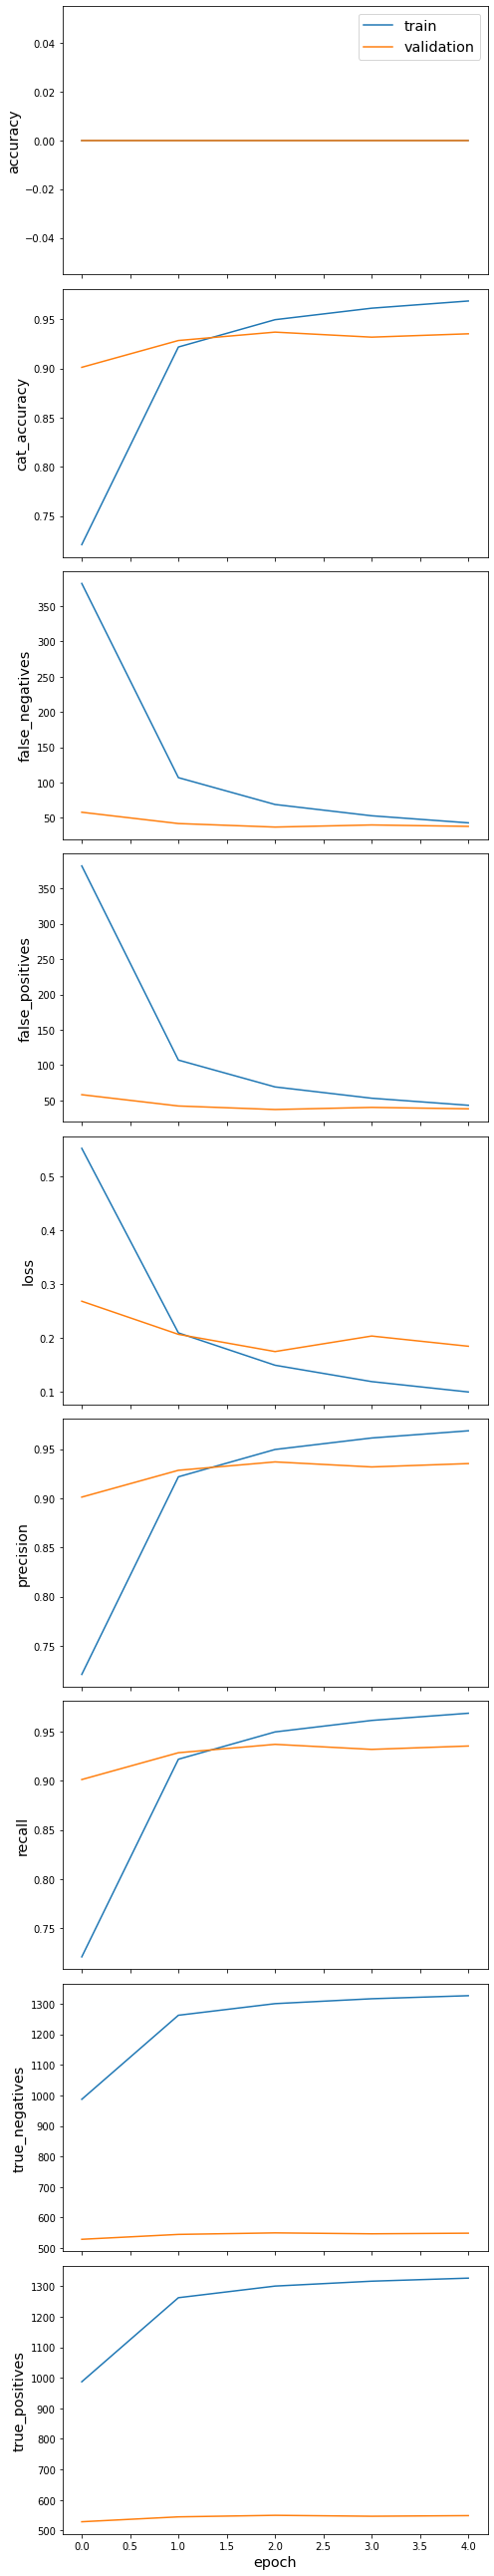

In [ ]:
#numero de amostras que vao ser propagadas na nede
batch_size = 32

# numero de viagens das amostras na rede
epochs = 5

#treina o modelo
history = model.fit(train_comments, train_labels, validation_data=(test_comments, test_labels), batch_size=batch_size, verbose=1, epochs=epochs)


sg.utils.plot_history(history)

In [ ]:
#calcula a sensibilidade de acordo com o n de true positives e false negatives
def sensitivity(tp, fn):
    sensitivity = tp / (tp + fn)

    return sensitivity



In [ ]:
#calcula a sensibilidade de acordo com o n fr true negatives e false positives
def specificity(tn, fp):
    specificity = tn / (tn + fp)
    return specificity


In [ ]:
test_loss, test_cat_acc, test_acc, test_precision, test_recall, test_true_negatives, test_true_positives, test_false_negatives, test_false_positives = model.evaluate(test_comments, test_labels)

19/19 [==============================] - 7s 374ms/step - loss: 0.1844 - cat_accuracy: 0.9353 - accuracy: 0.0000e+00 - precision: 0.9353 - recall: 0.9353 - true_negatives: 549.0000 - true_positives: 549.0000 - false_negatives: 38.0000 - false_positives: 38.0000


In [ ]:
# funcao para retornar um modelo compilado
def compileModel():
  model = keras.Sequential()
  MAX_NUM_WORDS = 5000
  embed_dim = 128
  lstm_out = 196


  model.add(tf.keras.layers.Embedding(MAX_NUM_WORDS, embed_dim, input_length=train_comments.shape[1]))
  model.add(tf.keras.layers.SpatialDropout1D(0.4))
  model.add(tf.keras.layers.LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.3))
  model.add(tf.keras.layers.Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer="adam", 
                metrics=[tf.keras.metrics.CategoricalAccuracy(name='cat_accuracy'),
                        tf.keras.metrics.Accuracy(name= 'accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'), 
                        tf.keras.metrics.TrueNegatives(name='true_negatives'),
                        tf.keras.metrics.TruePositives(name='true_positives'),
                        tf.keras.metrics.FalseNegatives(name='false_negatives'),
                        tf.keras.metrics.FalsePositives(name= 'false_positives')])
  
  print(model.summary())
  
  return model




In [ ]:
#funcao para retornar as metricas de avaliacao de um modelo 
def evaluateModel(model):
  
  test_loss, test_cat_acc, test_acc, test_precision, test_recall, test_true_negatives, test_true_positives, test_false_negatives, test_false_positives = model.evaluate(test_comments, test_labels)
  tn = test_true_negatives
  fp = test_false_positives
  tp = test_true_positives
  fn = test_false_negatives

  preds1 = model.predict(test_comments)

  #print('pred', preds1)

  mc = np.array(tf.math.confusion_matrix(test_labels, preds1))
  print('Matriz de confusao: \n', mc)
  print('Test loss(Confiabilidae Negativa):', test_loss)
  print('Test accuracy(Confiabilidade Positiva):', test_acc)
  print('Test categorical accuracy(Confiabilidade Positiva):', test_cat_acc)
  print('Test_precision(Confiabilidade Positiva):', test_precision)

  print('\n')

  print('test_true_negatives:', test_true_negatives)
  print('test_false_positives:', test_false_positives)
  print('test_true_positives:', test_true_positives)
  print('test_false_negatives:', test_false_negatives)

  print('\n')

  print('Especificidade:', specificity(tn, fp))

  print('Sensibilidade:', sensitivity(tp, fn))
  
  return test_loss, test_cat_acc, especificidade, sensibilidade, mc


In [ ]:
tn = test_true_negatives
fp = test_false_positives
tp = test_true_positives
fn = test_false_negatives

preds1 = model.predict(test_comments)

#print('pred', preds1)

mc = np.array(tf.math.confusion_matrix(test_labels, preds1))
print('Matriz de confusao: \n', mc)
print('Test loss(Confiabilidae Negativa):', test_loss)
print('Test accuracy(Confiabilidade Positiva):', test_acc)
print('Test categorical accuracy(Confiabilidade Positiva):', test_cat_acc)
print('Test_precision:', test_precision)

print('\n')

print('test_true_negatives:', test_true_negatives)
print('test_false_positives:', test_false_positives)
print('test_true_positives:', test_true_positives)
print('test_false_negatives:', test_false_negatives)

print('\n')
especificidade = specificity(tn, fp)
print('Especificidade:', especificidade)
sensibilidade = sensitivity(tp, fn)
print('Sensibilidade:', sensibilidade)


Matriz de confusao: 
 [[587 294]
 [293   0]]
Test loss(Confiabilidae Negativa): 0.18444453179836273
Test accuracy(Confiabilidade Positiva): 0.0
Test categorical accuracy(Confiabilidade Positiva): 0.9352640509605408
Test_precision: 0.9352640509605408


test_true_negatives: 549.0
test_false_positives: 38.0
test_true_positives: 549.0
test_false_negatives: 38.0


Especificidade: 0.9352640545144804
Sensibilidade: 0.9352640545144804


In [ ]:
weights = model.get_weights()

a <keras.engine.sequential.Sequential object at 0x7fb3b7c20b50>


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 280, 128)          640000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 280, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 895,194
Trainable params: 895,194
Non-trainable params: 0
_________________________________________________________________
None
INFO:tensorflow:Assets written to: ram://3ae1c388-e25e-4855-844f-26338739b611/assets


Epoch 1/5
43/43 [==============================] - 109s 2s/step - loss: 0.5511 - cat_accuracy: 0.7370 - accuracy: 0.0000e+00 - precision: 0.7370 - recall: 0.7370 - true_negatives: 1009.0000 - true_positives: 1009.0000 - false_negatives: 360.0000 - false_positives: 360.0000 - val_loss: 0.2628 - val_cat_accuracy: 0.9216 - val_accuracy: 0.0000e+00 - val_precision: 0.9216 - val_recall: 0.9216 - val_true_negatives: 541.0000 - val_true_positives: 541.0000 - val_false_negatives: 46.0000 - val_false_positives: 46.0000
Epoch 2/5
43/43 [==============================] - 99s 2s/step - loss: 0.2526 - cat_accuracy: 0.9196 - accuracy: 0.0000e+00 - precision: 0.9196 - recall: 0.9196 - true_negatives: 1259.0000 - true_positives: 1259.0000 - false_negatives: 110.0000 - false_positives: 110.0000 - val_loss: 0.2829 - val_cat_accuracy: 0.8654 - val_accuracy: 0.0000e+00 - val_precision: 0.8654 - val_recall: 0.8654 - val_true_negatives: 508.0000 - val_true_positives: 508.0000 - val_false_negatives: 79.0000 

INFO:tensorflow:Assets written to: ram://5cefb742-68de-4bb4-8b00-0f24865d521b/assets


Epoch 1/5
43/43 [==============================] - 104s 2s/step - loss: 0.5483 - cat_accuracy: 0.7005 - accuracy: 0.0000e+00 - precision: 0.7005 - recall: 0.7005 - true_negatives: 959.0000 - true_positives: 959.0000 - false_negatives: 410.0000 - false_positives: 410.0000 - val_loss: 0.2300 - val_cat_accuracy: 0.9284 - val_accuracy: 0.0000e+00 - val_precision: 0.9284 - val_recall: 0.9284 - val_true_negatives: 545.0000 - val_true_positives: 545.0000 - val_false_negatives: 42.0000 - val_false_positives: 42.0000
Epoch 2/5
43/43 [==============================] - 95s 2s/step - loss: 0.2413 - cat_accuracy: 0.9167 - accuracy: 0.0131 - precision: 0.9167 - recall: 0.9167 - true_negatives: 1255.0000 - true_positives: 1255.0000 - false_negatives: 114.0000 - false_positives: 114.0000 - val_loss: 0.1769 - val_cat_accuracy: 0.9284 - val_accuracy: 0.0043 - val_precision: 0.9284 - val_recall: 0.9284 - val_true_negatives: 545.0000 - val_true_positives: 545.0000 - val_false_negatives: 42.0000 - val_fals

INFO:tensorflow:Assets written to: ram://072ee919-8023-4dc2-9aa8-59e86899a7ce/assets


Epoch 1/5
43/43 [==============================] - 76s 2s/step - loss: 0.5403 - cat_accuracy: 0.7451 - accuracy: 0.0029 - precision: 0.7451 - recall: 0.7451 - true_negatives: 1020.0000 - true_positives: 1020.0000 - false_negatives: 349.0000 - false_positives: 349.0000 - val_loss: 0.2214 - val_cat_accuracy: 0.9302 - val_accuracy: 0.0434 - val_precision: 0.9302 - val_recall: 0.9302 - val_true_negatives: 546.0000 - val_true_positives: 546.0000 - val_false_negatives: 41.0000 - val_false_positives: 41.0000
Epoch 2/5
43/43 [==============================] - 70s 2s/step - loss: 0.2213 - cat_accuracy: 0.9233 - accuracy: 0.0015 - precision: 0.9233 - recall: 0.9233 - true_negatives: 1264.0000 - true_positives: 1264.0000 - false_negatives: 105.0000 - false_positives: 105.0000 - val_loss: 0.2380 - val_cat_accuracy: 0.9284 - val_accuracy: 0.0000e+00 - val_precision: 0.9284 - val_recall: 0.9284 - val_true_negatives: 545.0000 - val_true_positives: 545.0000 - val_false_negatives: 42.0000 - val_false_p

INFO:tensorflow:Assets written to: ram://e68a727e-e344-4fa8-8f73-26594b627806/assets


Epoch 1/5
43/43 [==============================] - 75s 2s/step - loss: 0.5563 - cat_accuracy: 0.7166 - accuracy: 0.0000e+00 - precision: 0.7166 - recall: 0.7166 - true_negatives: 981.0000 - true_positives: 981.0000 - false_negatives: 388.0000 - false_positives: 388.0000 - val_loss: 0.2812 - val_cat_accuracy: 0.9319 - val_accuracy: 0.0034 - val_precision: 0.9319 - val_recall: 0.9319 - val_true_negatives: 547.0000 - val_true_positives: 547.0000 - val_false_negatives: 40.0000 - val_false_positives: 40.0000
Epoch 2/5
43/43 [==============================] - 70s 2s/step - loss: 0.2477 - cat_accuracy: 0.9240 - accuracy: 0.0037 - precision: 0.9240 - recall: 0.9240 - true_negatives: 1265.0000 - true_positives: 1265.0000 - false_negatives: 104.0000 - false_positives: 104.0000 - val_loss: 0.1687 - val_cat_accuracy: 0.9370 - val_accuracy: 0.0000e+00 - val_precision: 0.9370 - val_recall: 0.9370 - val_true_negatives: 550.0000 - val_true_positives: 550.0000 - val_false_negatives: 37.0000 - val_false

INFO:tensorflow:Assets written to: ram://ea3503c9-ee61-4d2e-9715-f0da49f870a2/assets


Epoch 1/5
43/43 [==============================] - 76s 2s/step - loss: 0.5607 - cat_accuracy: 0.7173 - accuracy: 0.0000e+00 - precision: 0.7173 - recall: 0.7173 - true_negatives: 982.0000 - true_positives: 982.0000 - false_negatives: 387.0000 - false_positives: 387.0000 - val_loss: 0.2696 - val_cat_accuracy: 0.8910 - val_accuracy: 0.0000e+00 - val_precision: 0.8910 - val_recall: 0.8910 - val_true_negatives: 523.0000 - val_true_positives: 523.0000 - val_false_negatives: 64.0000 - val_false_positives: 64.0000
Epoch 2/5
43/43 [==============================] - 70s 2s/step - loss: 0.2220 - cat_accuracy: 0.9153 - accuracy: 0.0000e+00 - precision: 0.9153 - recall: 0.9153 - true_negatives: 1253.0000 - true_positives: 1253.0000 - false_negatives: 116.0000 - false_positives: 116.0000 - val_loss: 0.2003 - val_cat_accuracy: 0.9336 - val_accuracy: 0.0000e+00 - val_precision: 0.9336 - val_recall: 0.9336 - val_true_negatives: 548.0000 - val_true_positives: 548.0000 - val_false_negatives: 39.0000 - v

INFO:tensorflow:Assets written to: ram://f541503f-da4b-46c4-9731-96ef3b84baa5/assets


Epoch 1/5
43/43 [==============================] - 74s 2s/step - loss: 0.5548 - cat_accuracy: 0.7268 - accuracy: 0.0000e+00 - precision: 0.7268 - recall: 0.7268 - true_negatives: 995.0000 - true_positives: 995.0000 - false_negatives: 374.0000 - false_positives: 374.0000 - val_loss: 0.2807 - val_cat_accuracy: 0.9302 - val_accuracy: 0.0000e+00 - val_precision: 0.9302 - val_recall: 0.9302 - val_true_negatives: 546.0000 - val_true_positives: 546.0000 - val_false_negatives: 41.0000 - val_false_positives: 41.0000
Epoch 2/5
43/43 [==============================] - 71s 2s/step - loss: 0.2378 - cat_accuracy: 0.9145 - accuracy: 0.0000e+00 - precision: 0.9145 - recall: 0.9145 - true_negatives: 1252.0000 - true_positives: 1252.0000 - false_negatives: 117.0000 - false_positives: 117.0000 - val_loss: 0.1833 - val_cat_accuracy: 0.9353 - val_accuracy: 0.0000e+00 - val_precision: 0.9353 - val_recall: 0.9353 - val_true_negatives: 549.0000 - val_true_positives: 549.0000 - val_false_negatives: 38.0000 - v

INFO:tensorflow:Assets written to: ram://f91244d2-af30-4ab5-b8e4-45e956526448/assets


Epoch 1/5
43/43 [==============================] - 74s 2s/step - loss: 0.5441 - cat_accuracy: 0.7378 - accuracy: 3.6523e-04 - precision: 0.7378 - recall: 0.7378 - true_negatives: 1010.0000 - true_positives: 1010.0000 - false_negatives: 359.0000 - false_positives: 359.0000 - val_loss: 0.2437 - val_cat_accuracy: 0.9250 - val_accuracy: 0.0494 - val_precision: 0.9250 - val_recall: 0.9250 - val_true_negatives: 543.0000 - val_true_positives: 543.0000 - val_false_negatives: 44.0000 - val_false_positives: 44.0000
Epoch 2/5
43/43 [==============================] - 70s 2s/step - loss: 0.2416 - cat_accuracy: 0.9218 - accuracy: 0.0172 - precision: 0.9218 - recall: 0.9218 - true_negatives: 1262.0000 - true_positives: 1262.0000 - false_negatives: 107.0000 - false_positives: 107.0000 - val_loss: 0.1869 - val_cat_accuracy: 0.9319 - val_accuracy: 0.0000e+00 - val_precision: 0.9319 - val_recall: 0.9319 - val_true_negatives: 547.0000 - val_true_positives: 547.0000 - val_false_negatives: 40.0000 - val_fal

INFO:tensorflow:Assets written to: ram://bb7fbd39-5371-4b44-bd7a-511555798470/assets


Epoch 1/5
43/43 [==============================] - 76s 2s/step - loss: 0.5287 - cat_accuracy: 0.7305 - accuracy: 3.6523e-04 - precision: 0.7305 - recall: 0.7305 - true_negatives: 1000.0000 - true_positives: 1000.0000 - false_negatives: 369.0000 - false_positives: 369.0000 - val_loss: 0.2433 - val_cat_accuracy: 0.8995 - val_accuracy: 0.0128 - val_precision: 0.8995 - val_recall: 0.8995 - val_true_negatives: 528.0000 - val_true_positives: 528.0000 - val_false_negatives: 59.0000 - val_false_positives: 59.0000
Epoch 2/5
43/43 [==============================] - 70s 2s/step - loss: 0.2221 - cat_accuracy: 0.9313 - accuracy: 0.0248 - precision: 0.9313 - recall: 0.9313 - true_negatives: 1275.0000 - true_positives: 1275.0000 - false_negatives: 94.0000 - false_positives: 94.0000 - val_loss: 0.1911 - val_cat_accuracy: 0.9353 - val_accuracy: 0.0000e+00 - val_precision: 0.9353 - val_recall: 0.9353 - val_true_negatives: 549.0000 - val_true_positives: 549.0000 - val_false_negatives: 38.0000 - val_false

INFO:tensorflow:Assets written to: ram://993f3ae9-d56e-4913-8e93-2b83c702fe3e/assets


Epoch 1/5
43/43 [==============================] - 78s 2s/step - loss: 0.5364 - cat_accuracy: 0.7202 - accuracy: 0.0018 - precision: 0.7202 - recall: 0.7202 - true_negatives: 986.0000 - true_positives: 986.0000 - false_negatives: 383.0000 - false_positives: 383.0000 - val_loss: 0.2425 - val_cat_accuracy: 0.9319 - val_accuracy: 0.0860 - val_precision: 0.9319 - val_recall: 0.9319 - val_true_negatives: 547.0000 - val_true_positives: 547.0000 - val_false_negatives: 40.0000 - val_false_positives: 40.0000
Epoch 2/5
43/43 [==============================] - 72s 2s/step - loss: 0.2231 - cat_accuracy: 0.9255 - accuracy: 0.0121 - precision: 0.9255 - recall: 0.9255 - true_negatives: 1267.0000 - true_positives: 1267.0000 - false_negatives: 102.0000 - false_positives: 102.0000 - val_loss: 0.1712 - val_cat_accuracy: 0.9370 - val_accuracy: 0.0000e+00 - val_precision: 0.9370 - val_recall: 0.9370 - val_true_negatives: 550.0000 - val_true_positives: 550.0000 - val_false_negatives: 37.0000 - val_false_pos

INFO:tensorflow:Assets written to: ram://ae8b396e-dcc5-41a8-85ea-1f484a90f894/assets


Epoch 1/5
43/43 [==============================] - 80s 2s/step - loss: 0.5255 - cat_accuracy: 0.7502 - accuracy: 0.0000e+00 - precision: 0.7502 - recall: 0.7502 - true_negatives: 1027.0000 - true_positives: 1027.0000 - false_negatives: 342.0000 - false_positives: 342.0000 - val_loss: 0.2487 - val_cat_accuracy: 0.9063 - val_accuracy: 0.0034 - val_precision: 0.9063 - val_recall: 0.9063 - val_true_negatives: 532.0000 - val_true_positives: 532.0000 - val_false_negatives: 55.0000 - val_false_positives: 55.0000
Epoch 2/5
43/43 [==============================] - 75s 2s/step - loss: 0.2045 - cat_accuracy: 0.9233 - accuracy: 0.0091 - precision: 0.9233 - recall: 0.9233 - true_negatives: 1264.0000 - true_positives: 1264.0000 - false_negatives: 105.0000 - false_positives: 105.0000 - val_loss: 0.1928 - val_cat_accuracy: 0.9370 - val_accuracy: 0.0000e+00 - val_precision: 0.9370 - val_recall: 0.9370 - val_true_negatives: 550.0000 - val_true_positives: 550.0000 - val_false_negatives: 37.0000 - val_fal

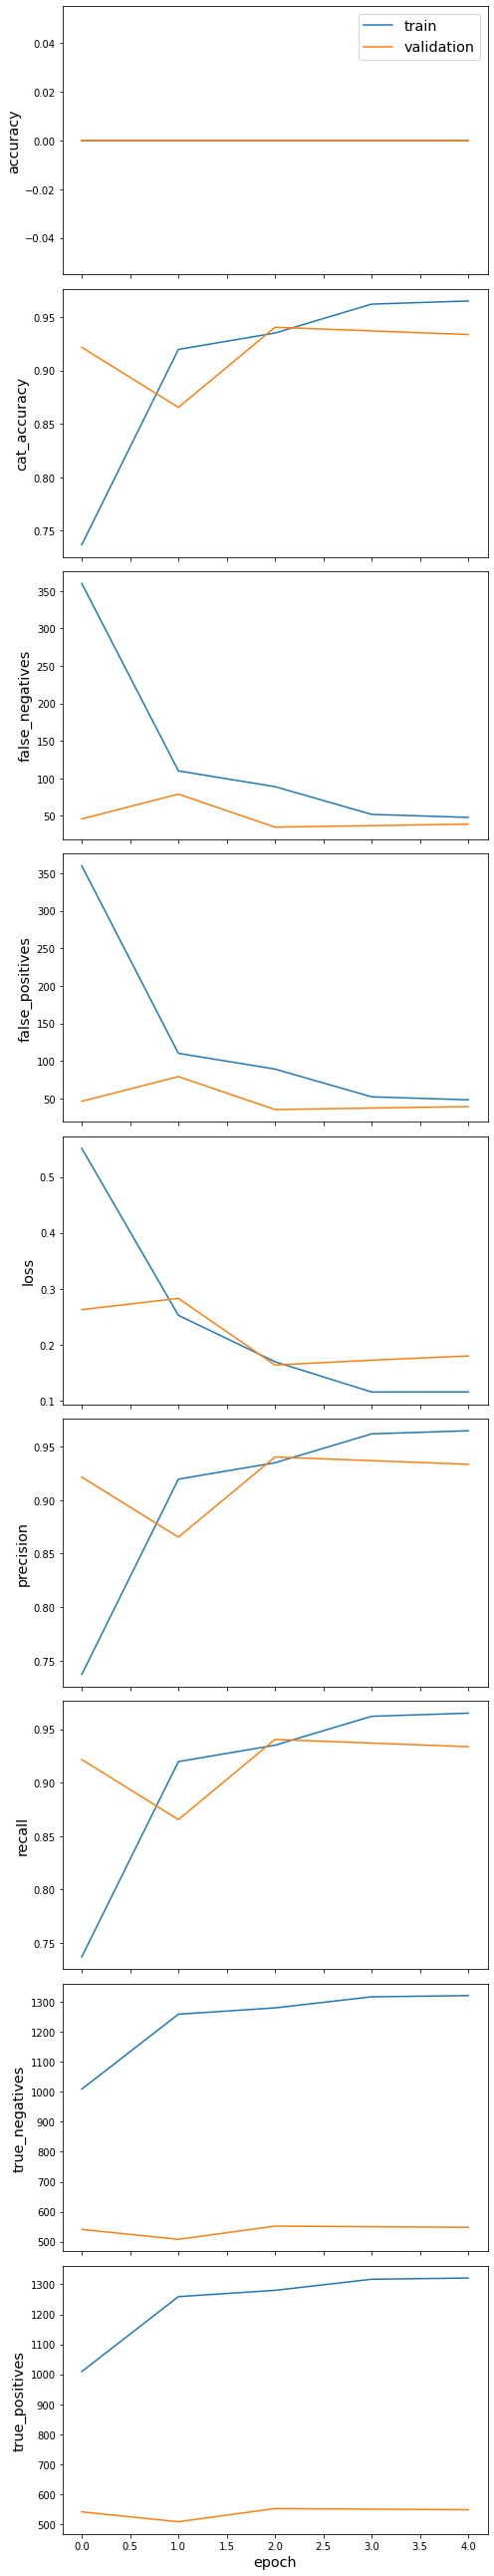

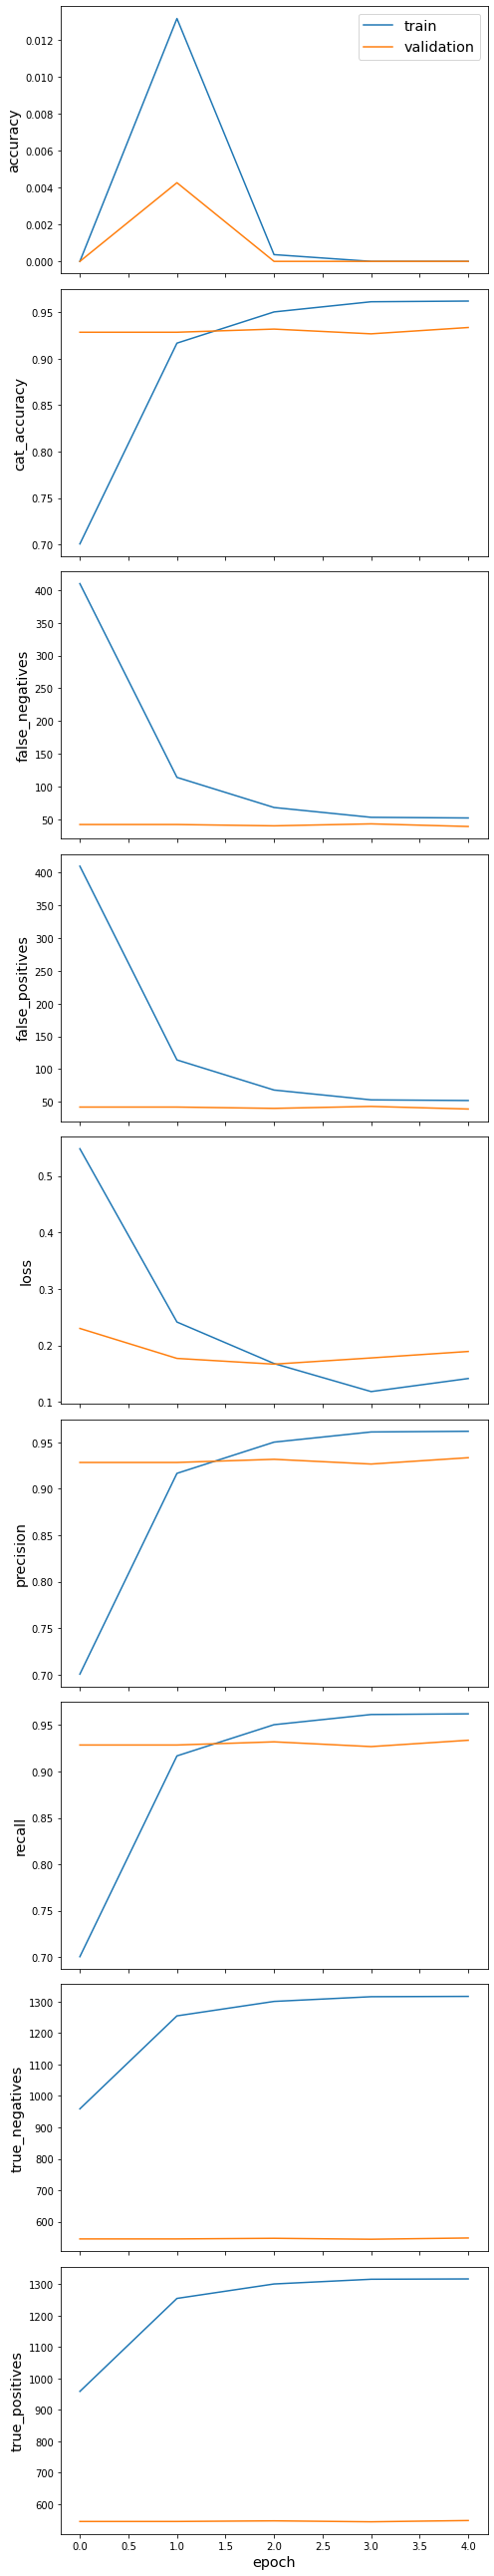

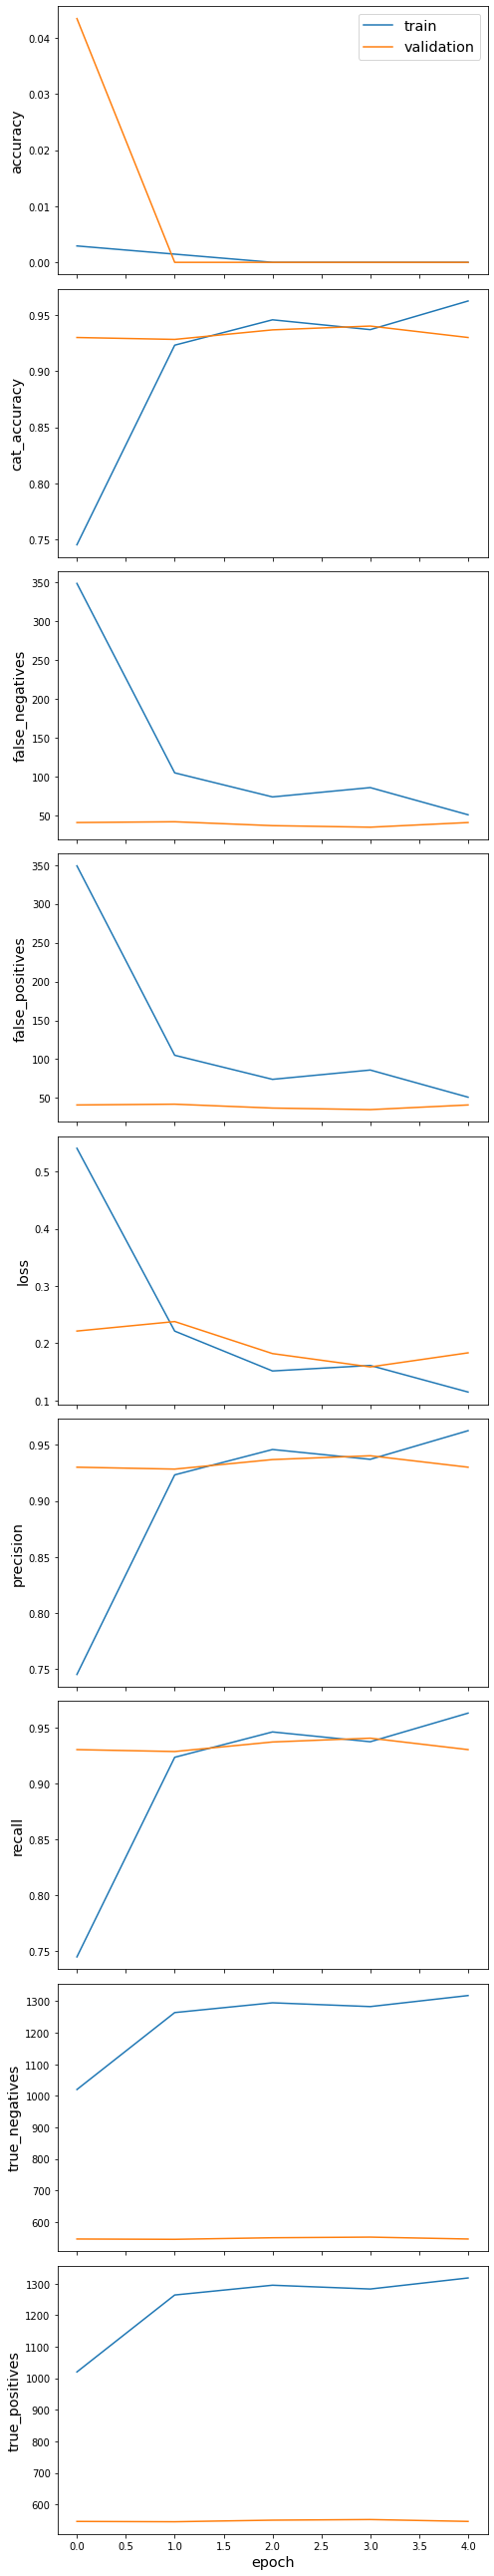

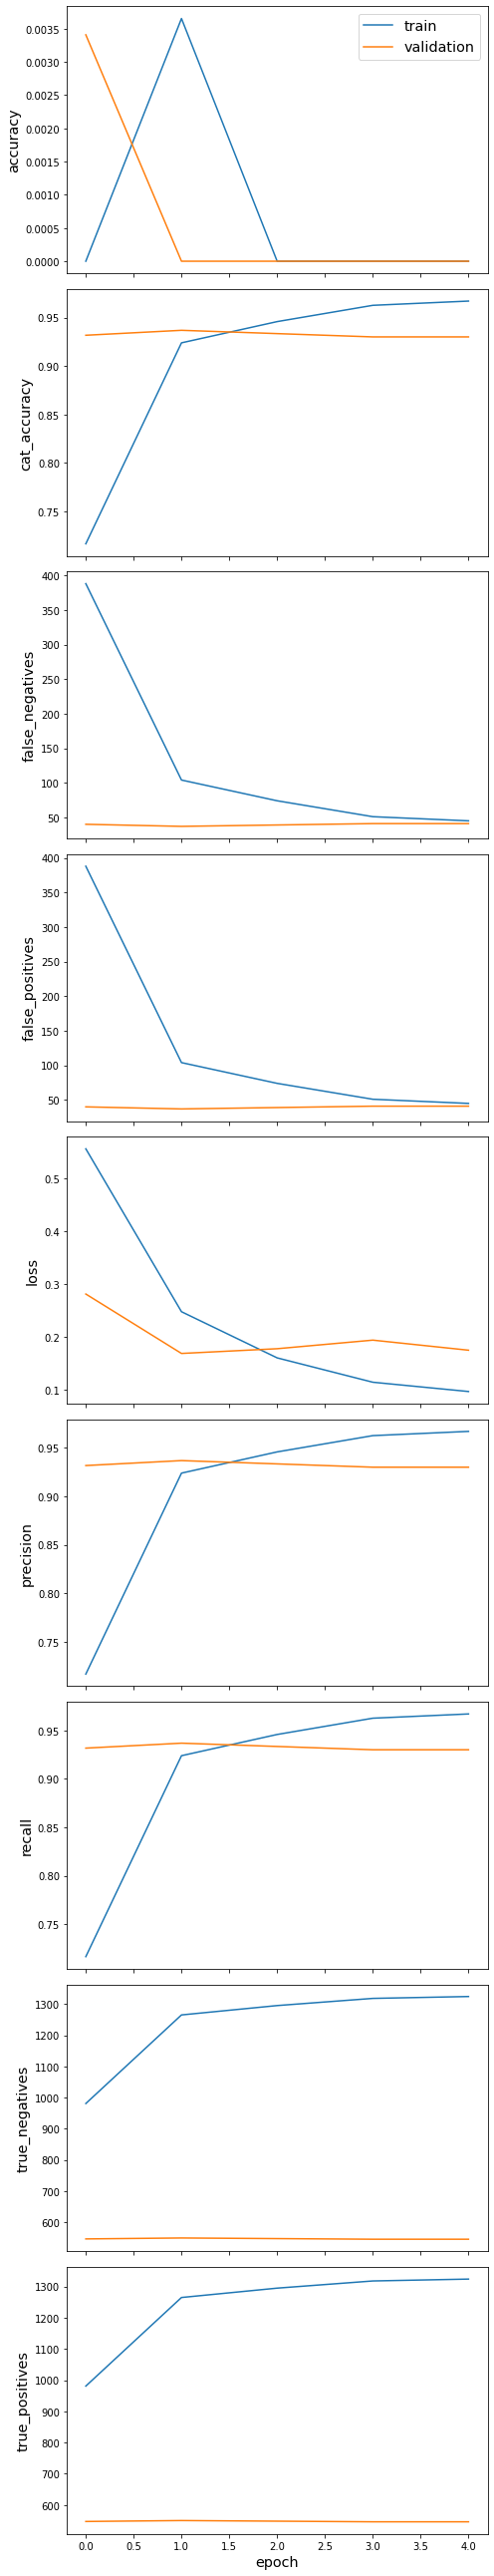

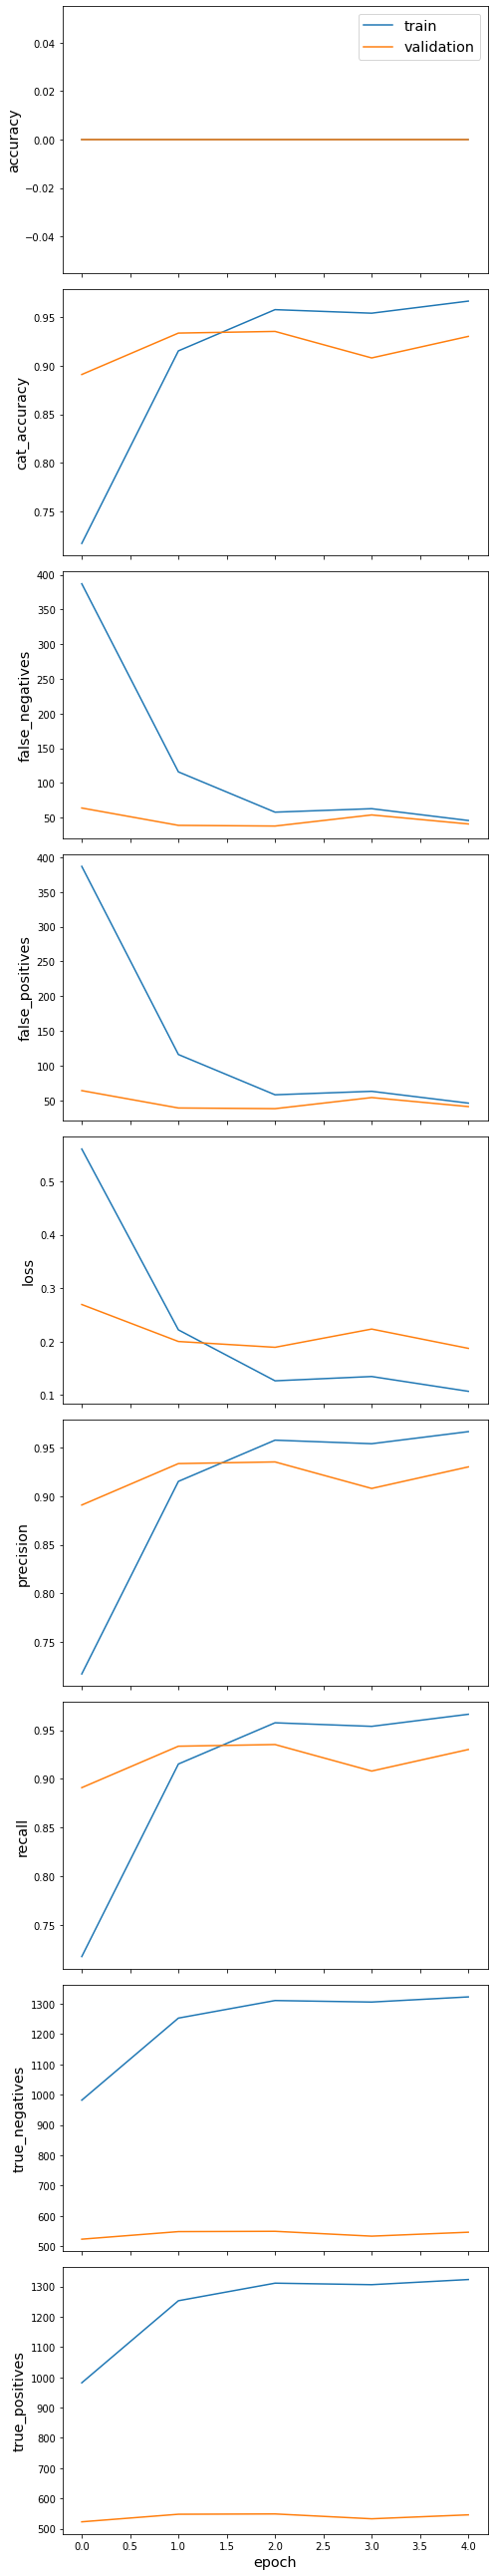

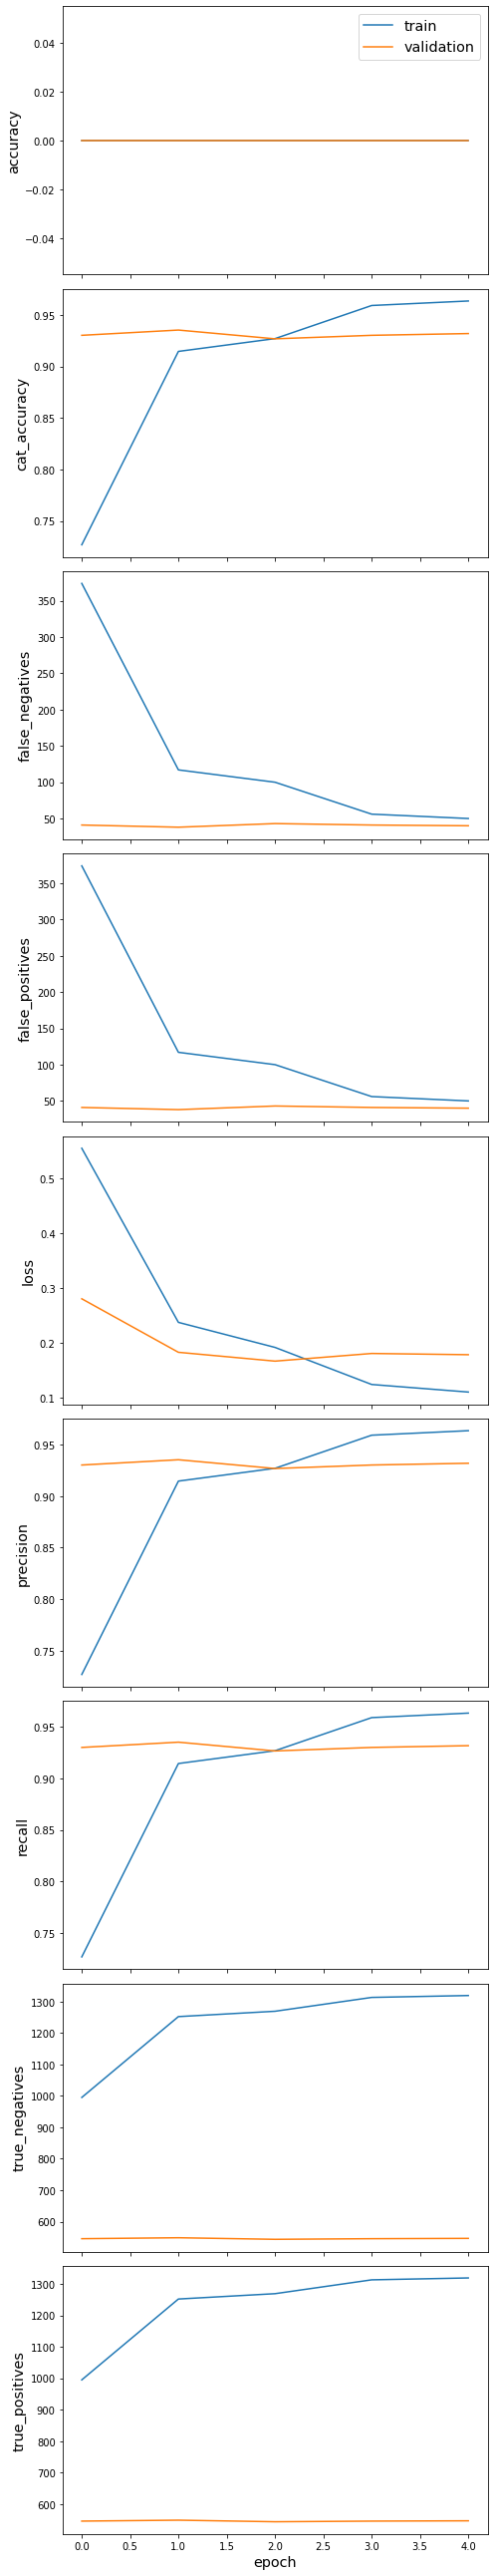

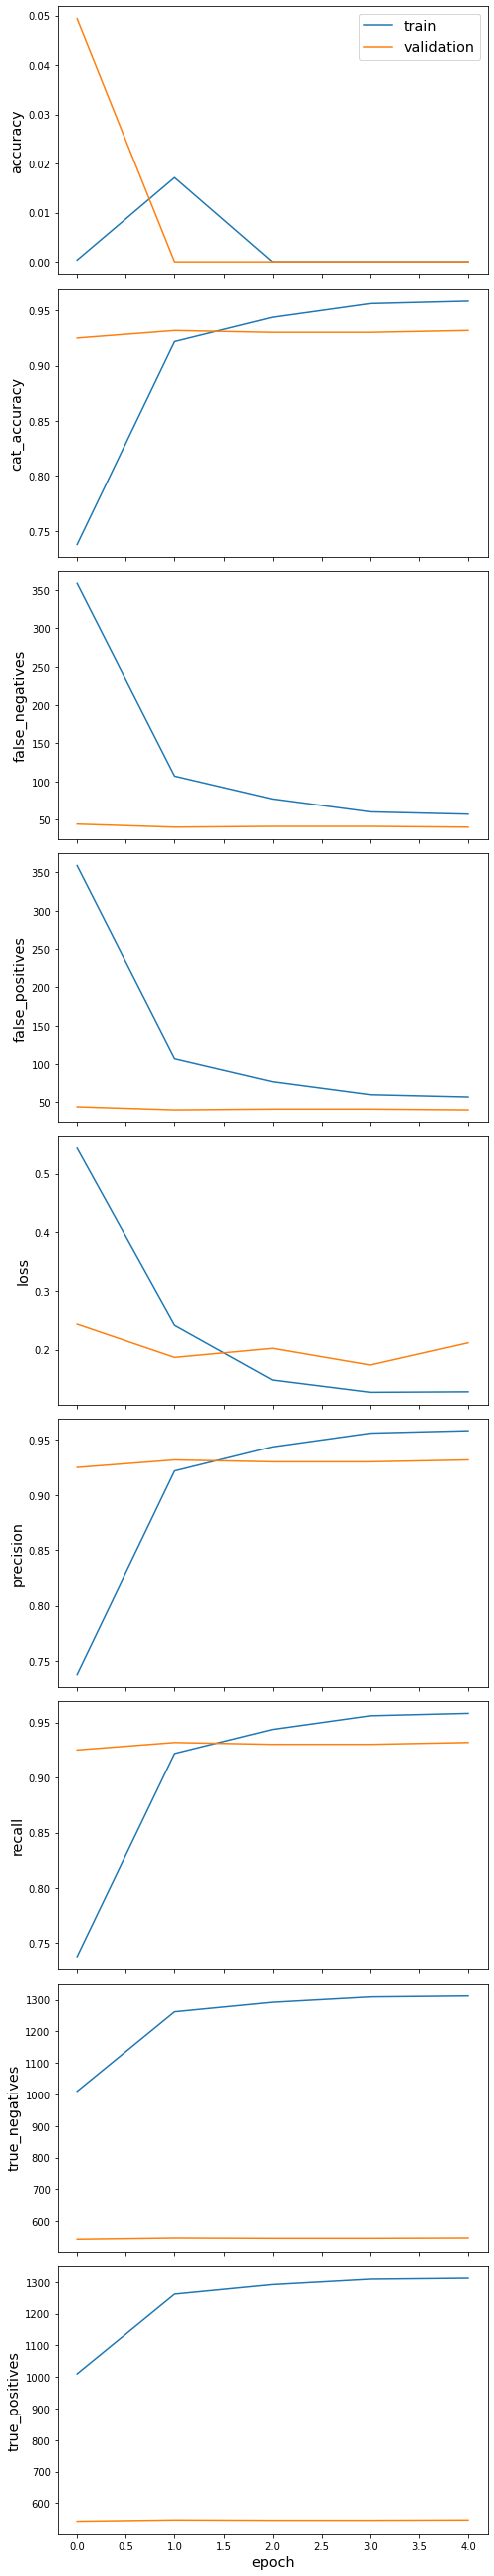

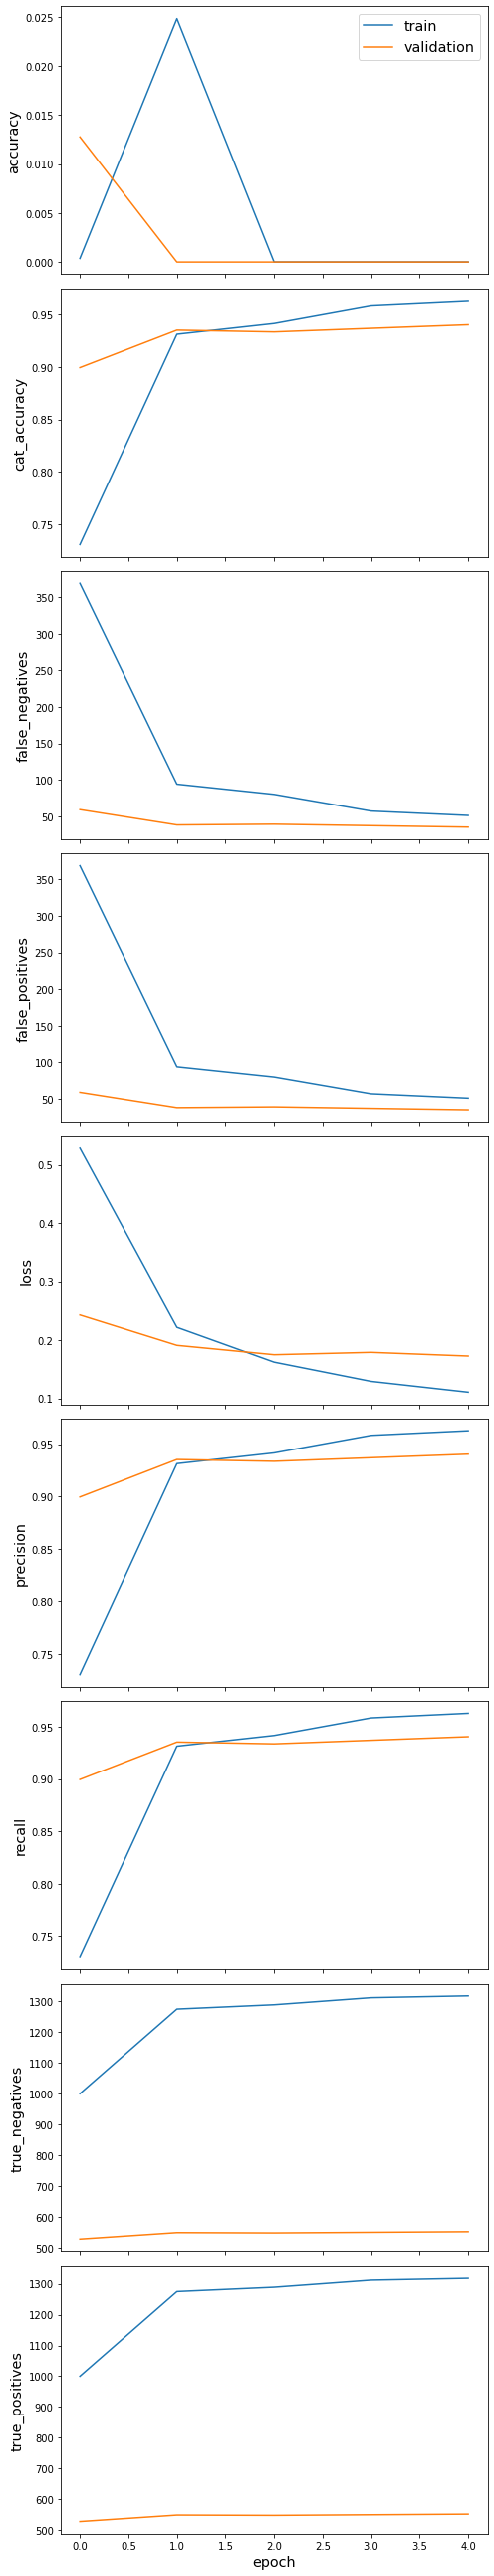

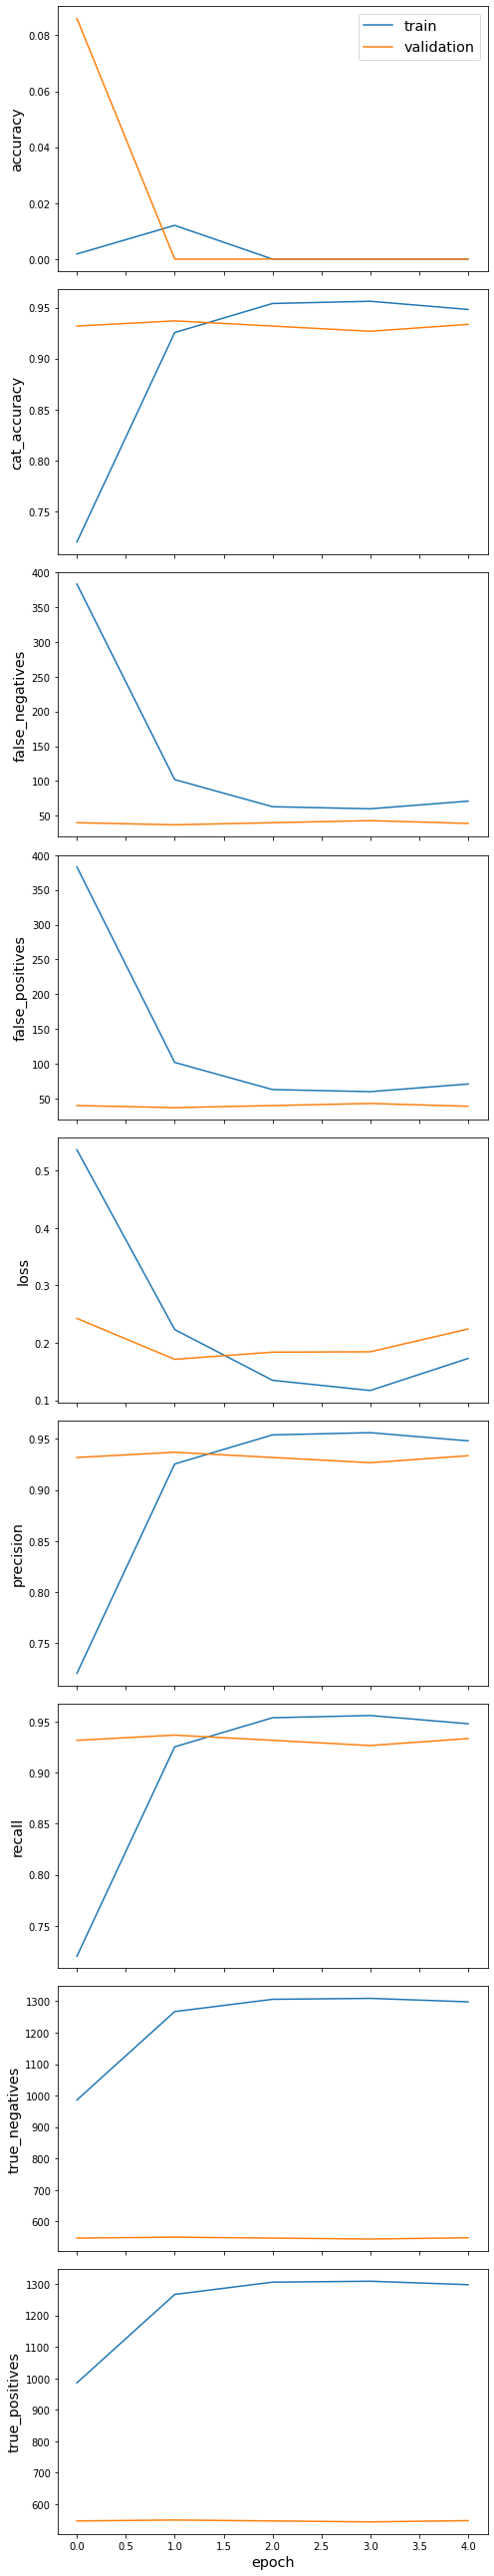

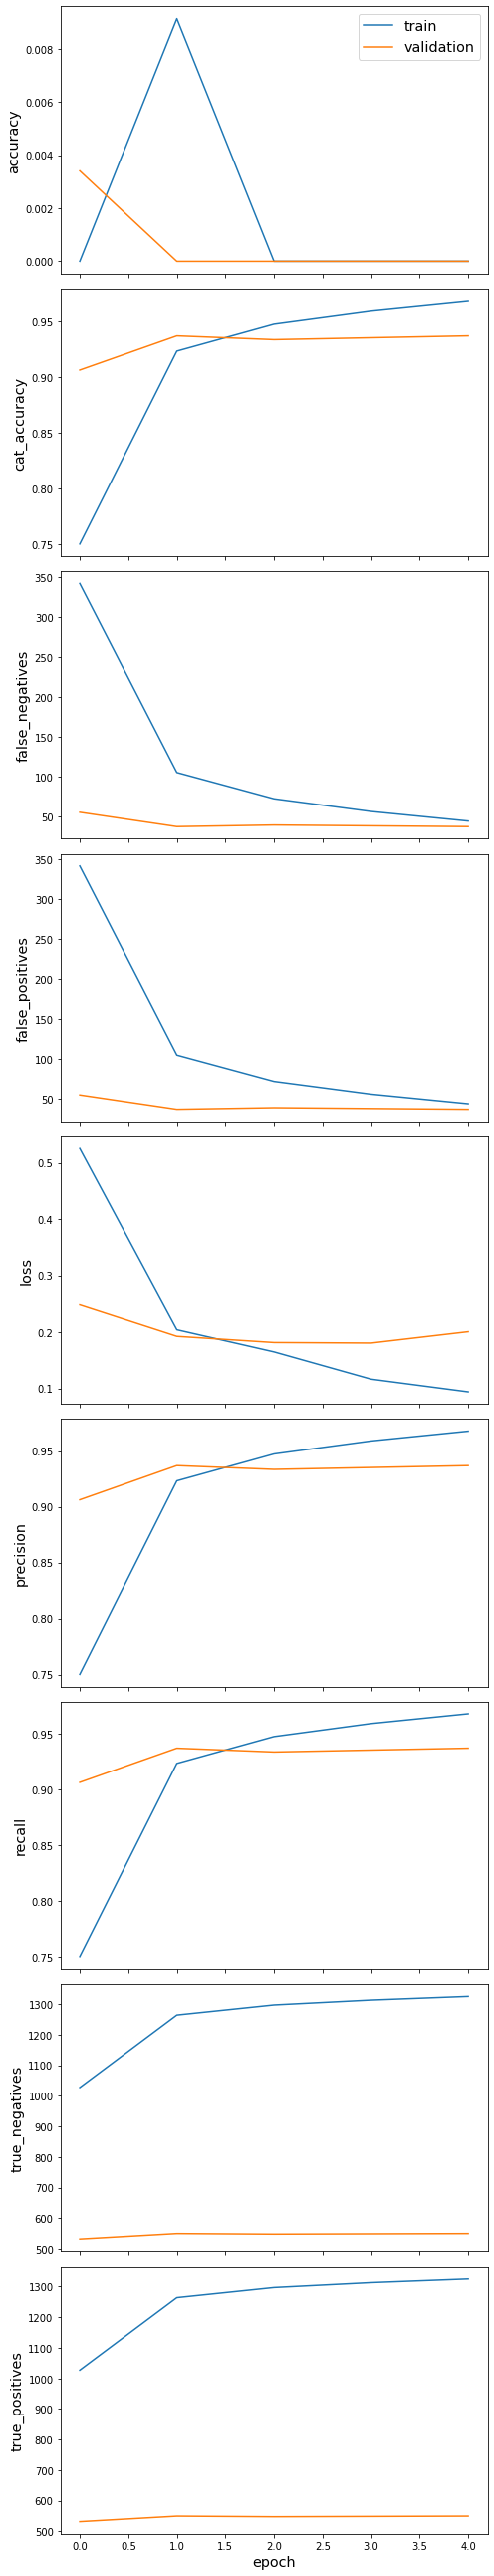

In [ ]:
batch_size = 32
epochs = 5
model_list = []
acc_list = []
table = []
data = []


#compila, treina e avalia modelos e os compara
for i in range(10):
  model = copy.deepcopy(compileModel())
  
  history = model.fit(train_comments, train_labels, validation_data=(test_comments, test_labels), batch_size=batch_size, verbose=1, epochs=epochs)

  sg.utils.plot_history(history)

  test_loss, test_cat_acc, especificidade, sensibilidade, mc = evaluateModel(model)
  model_list.append(model)
  acc_list.append(test_cat_acc)
  data = [test_loss, test_cat_acc, especificidade, sensibilidade, mc]
  table.append(data)

print("Media acc:", np.average(acc_list))
print("Desvio acc:", np.std(acc_list))
minAcc = min(acc_list)
print("Min acc:", minAcc)
print("Best model:\n", model_list[acc_list.index(minAcc)].summary()) 

In [ ]:
print("Media acc:", np.average(acc_list))
print("Desvio acc:", np.std(acc_list))
minAcc = min(acc_list)
print("Min acc:", minAcc)
print("Best model:\n", model_list[acc_list.index(minAcc)].summary()) 

Media acc: 0.9332197546958924
Desvio acc: 0.003122714125260237
Min acc: 0.9301533102989197
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 280, 128)          640000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 280, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 196)               254800    
                                                                 
 dense_3 (Dense)             (None, 2)                 394       
                                                                 
Total params: 895,194
Trainable params: 895,194
Non-trainable params: 0
_________________________________________________________________
Best model:
 None


In [ ]:
#tabela com as metricas de cada modelo das execucoes
dataf = pd.DataFrame(table, columns = ["Test loss", "Test accuracy", "Especificidade", "Sensibilidade", "Matriz de confusao"])

datafTable = dataf.to_csv('metrics.csv')
dfData = pd.read_csv('metrics.csv')

In [ ]:
dfData

,Unnamed: 0,Test loss,Test accuracy,Especificidade,Sensibilidade,Matriz de confusao
0,0,0.179993,0.933560,0.935264,0.935264,[[587 294]\n [293 0]]
1,1,0.189165,0.933560,0.935264,0.935264,[[587 294]\n [293 0]]
2,2,0.183413,0.930153,0.935264,0.935264,[[587 294]\n [293 0]]
3,3,0.174808,0.930153,0.935264,0.935264,[[587 294]\n [293 0]]
4,4,0.187423,0.930153,0.935264,0.935264,[[587 294]\n [293 0]]
5,5,0.178875,0.931857,0.935264,0.935264,[[587 294]\n [293 0]]
6,6,0.211828,0.931857,0.935264,0.935264,[[587 294]\n [293 0]]
7,7,0.172766,0.940375,0.935264,0.935264,[[587 294]\n [293 0]]
8,8,0.224107,0.933560,0.935264,0.935264,[[587 294]\n [293 0]]
9,9,0.200987,0.936968,0.935264,0.935264,[[587 294]\n [293 0]]


In [ ]:
# preve a classe de um possivel comentario em String
def predict(text_str, max_words=280, max_sequence = 280, tokenizer=None):
    if not tokenizer:
      return None
    sequences = tokenizer.texts_to_sequences([text_str])
    train_comments = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence)
   
    label_output = model.predict(train_comments)
    
    top_label_index = np.argmax(label_output)
   
    preds = label_output[0]
    pred = preds[top_label_index]
   
    labeled_preds = [{f"{labels_legend[str(i)]}": x} for i, x in enumerate(preds)]
    
    return labeled_preds

In [ ]:
# max_sequence = 280
# max_words = 1000

In [ ]:
predict("nice video 777777", max_words=max_words, max_sequence=max_sequence, tokenizer=tokenizer)


[{'ham': 0.7520105}, {'spam': 0.24798952}]

In [ ]:
predict("freebitcoins.com", max_words=max_words, max_sequence=max_sequence, tokenizer=tokenizer)

[{'ham': 0.068733856}, {'spam': 0.9312661}]